In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
! pip install graphviz

In [2]:
### Load the required libraries
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

In [12]:
test1 = np.array([1,0,1,0,1,0,1,0,1])
test2 = np.array([7.5,6,7,4,5,10,9.5,8.8,9])
x = np.array([test1,test2])

job = np.array([0,0,0,0,0,1,1,1,1])

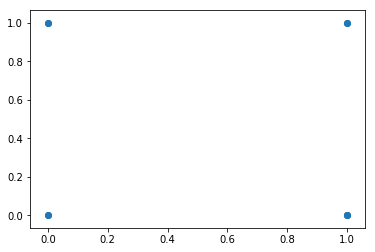

In [13]:
plt.scatter(test1,job)

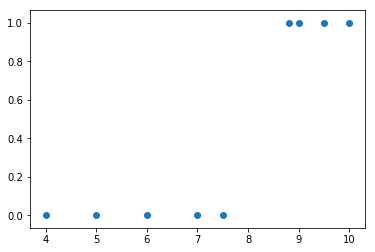

In [14]:
plt.scatter(test2,job)

In [15]:
dtc = DecisionTreeClassifier()

In [16]:
dtc.fit(X=x.T,y=job)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
dtc.predict(X=x.T)

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

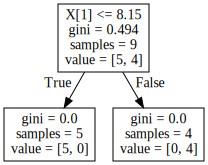

In [24]:
graphviz.Source(export_graphviz(dtc, out_file=None))

In [25]:
## Gini
1 - (((5/9)**2)+((4/9)**2))

0.49382716049382713

In [26]:
## Gini After

In [27]:
1 - (((5/9)*((5/5)**2)) + ((4/9)*((4/4)**2)))

0.0

## DTC

In [3]:
bank1 = pd.read_csv("new_bank.csv")

In [4]:
bank1.head()

,age,marital,balance,loan,contact,y
0,30,married,1787,no,cellular,no
1,33,married,4789,yes,cellular,no
2,35,single,1350,no,cellular,no
3,30,married,1476,yes,unknown,no
4,59,married,0,no,unknown,no


In [5]:
bank2 = pd.get_dummies(bank1,columns = ["marital","loan","contact","y"],drop_first=True)

In [1]:
trainx,testx,trainy,testy = train_test_split(bank2.iloc[:,:-1],bank2.iloc[:,-1],test_size=0.3,random_state=1)

NameError: name 'train_test_split' is not defined

## DTC with no paramater tuning

In [32]:
dtc = DecisionTreeClassifier()

In [33]:
dtc.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
pred_train = dtc.predict(trainx)
pred_test = dtc.predict(testx)

In [35]:
print("Accuracy on train is:",accuracy_score(trainy,pred_train))
print("Accuracy on test is:",accuracy_score(testy,pred_test))

Accuracy on train is: 0.9949431099873578
Accuracy on test is: 0.7966101694915254


## DTC with maxdepth

In [36]:
dtc_2 = DecisionTreeClassifier(max_depth=2)

In [37]:
dtc_2.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
pred_train_2 = dtc_2.predict(trainx)
pred_test_2 = dtc_2.predict(testx)

In [39]:
print("Accuracy on train is:",accuracy_score(trainy,pred_train_2))
print("Accuracy on test is:",accuracy_score(testy,pred_test_2))

Accuracy on train is: 0.8912768647281921
Accuracy on test is: 0.8703021370670597


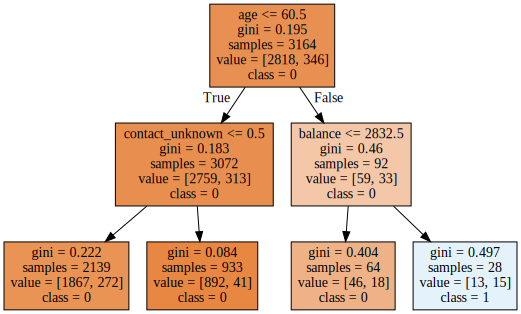

In [42]:
graphviz.Source(export_graphviz(dtc_2,feature_names=trainx.columns,filled=True,class_names=["0","1"],out_file=None))

# DTR

In [43]:
customer1 = pd.read_csv("new_customer.csv")

In [44]:
customer1.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,NoOfGamesBought,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,10,Uniform,107.51
1,1,2,3,6,7,Uniform,382.40
2,1,4,3,5,18,Uniform,135.01
3,1,1,6,6,11,Uniform,125.00
4,1,3,6,9,44,Uniform,335.05


In [45]:
customer2 = pd.get_dummies(customer1,columns=["City","FavoriteGame"],drop_first=True)

In [46]:
customer2.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteGame_Uniform
0,2,3,8,10,107.51,0,1
1,2,3,6,7,382.40,0,1
2,4,3,5,18,135.01,0,1
3,1,6,6,11,125.00,0,1
4,3,6,9,44,335.05,0,1


In [47]:
trainx,testx,trainy,testy = train_test_split(customer2.iloc[:,np.r_[0:4,5,6]],customer2.TotalRevenueGenerated,test_size=0.3,random_state=1)

In [48]:
# train_test_split(customer2.iloc[:,np.r_[0:4,5,6]],customer2.TotalRevenueGenerated)

## DTR with no paramater tuning

In [49]:
dtr = DecisionTreeRegressor()

In [50]:
dtr.fit(trainx,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
pred_train = dtr.predict(trainx)
pred_test = dtr.predict(testx)

In [52]:
print("Train Error:", mean_absolute_error(trainy,pred_train))
print("Test Error:",mean_absolute_error(testy,pred_test))

Train Error: 16.37274640549418
Test Error: 52.873746707861194


## DTR with max depth

In [53]:
dtr_2 = DecisionTreeRegressor(max_depth = 2)

In [54]:
dtr_2.fit(trainx,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
pred_train_2 = dtr_2.predict(trainx)
pred_test_2 = dtr_2.predict(testx)

In [56]:
print("Train Error:", mean_absolute_error(trainy,pred_train_2))
print("Test Error:",mean_absolute_error(testy,pred_test_2))

Train Error: 44.56487220749386
Test Error: 45.6911949252883
